CREDIT CARD FRAUD DETECTION

IMPORTING ENVIRONMENTS

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

LOADING AND INSPECTING THE DATA

In [2]:
df= pd.read_csv(r"C:\Users\Angelique\Downloads\fraudTest.csv\fraudTest.csv")
df

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28   Ashley   
3                          fraud_Haley Group        misc_pos   60.05    Brian   
4                      fraud_Johnston-Casper          travel    3.19   Nathan   
...                                      ...             ...     ...      ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77  Michael   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84     Jose   
555716                       fraud_Rau-Robel       kids_pets   86.88      Ann   
555717                 fraud_Breitenberg LLC          travel    7.99     Eric   
555718                     fraud_Dare-Marvin   entertainment   38.13   Samuel   

            last gender                       street  ...      lat      long  \
0        Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1       Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2          Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3       Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4         Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   
...          ...    ...                          ...  ...      ...       ...   
555714     Olson      M          558 Michael Estates  ...  40.4931  -91.8912   
555715   Vasquez      M          572 Davis Mountains  ...  29.0393  -95.4401   
555716    Lawson      F   144 Evans Islands Apt. 683  ...  46.1966 -118.9017   
555717   Preston      M   7020 Doyle Stream Apt. 951  ...  44.6255 -116.4493   
555718      Frey      M     830 Myers Plaza Apt. 384  ...  35.6665  -97.4798   

        city_pop                     job         dob  \
0         333497     Mechanical engineer  1968-03-19   
1            302  Sales professional, IT  1990-01-17   
2          34496       Librarian, public  1970-10-21   
3          54767            Set designer  1987-07-25   
4           1126      Furniture designer  1955-07-06   
...          ...                     ...         ...   
555714       519            Town planner  1966-02-13   
555715     28739          Futures trader  1999-12-27   
555716      3684                Musician  1981-11-29   
555717       129            Cartographer  1965-12-15   
555718    116001             Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
df.describe().T

count          mean           std           min           25%  \
Unnamed: 0  555719.0  2.778590e+05  1.604224e+05  0.000000e+00  1.389295e+05   
cc_num      555719.0  4.178387e+17  1.309837e+18  6.041621e+10  1.800429e+14   
amt         555719.0  6.939281e+01  1.567459e+02  1.000000e+00  9.630000e+00   
zip         555719.0  4.884263e+04  2.685528e+04  1.257000e+03  2.629200e+04   
lat         555719.0  3.854325e+01  5.061336e+00  2.002710e+01  3.466890e+01   
long        555719.0 -9.023133e+01  1.372178e+01 -1.656723e+02 -9.679800e+01   
city_pop    555719.0  8.822189e+04  3.003909e+05  2.300000e+01  7.410000e+02   
unix_time   555719.0  1.380679e+09  5.201104e+06  1.371817e+09  1.376029e+09   
merch_lat   555719.0  3.854280e+01  5.095829e+00  1.902742e+01  3.475530e+01   
merch_long  555719.0 -9.023138e+01  1.373307e+01 -1.666716e+02 -9.690513e+01   
is_fraud    555719.0  3.859864e-03  6.200784e-02  0.000000e+00  0.000000e+00   

                     50%           75%           max  
Unnamed: 0  2.778590e+05  4.167885e+05  5.557180e+05  
cc_num      3.521417e+15  4.635331e+15  4.992346e+18  
amt         4.729000e+01  8.301000e+01  2.276811e+04  
zip         4.817400e+04  7.201100e+04  9.992100e+04  
lat         3.937160e+01  4.189480e+01  6.568990e+01  
long       -8.747690e+01 -8.017520e+01 -6.795030e+01  
city_pop    2.408000e+03  1.968500e+04  2.906700e+06  
unix_time   1.380762e+09  1.385867e+09  1.388534e+09  
merch_lat   3.937659e+01  4.195416e+01  6.667930e+01  
merch_long -8.744520e+01 -8.026464e+01 -6.695203e+01  
is_fraud    0.000000e+00  0.000000e+00  1.000000e+00

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.shape

(555719, 23)

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

DATA PREPROCESSING

In [9]:
df.isnull().head()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0       False                  False   False     False     False  False   
1       False                  False   False     False     False  False   
2       False                  False   False     False     False  False   
3       False                  False   False     False     False  False   
4       False                  False   False     False     False  False   

   first   last  gender  street  ...    lat   long  city_pop    job    dob  \
0  False  False   False   False  ...  False  False     False  False  False   
1  False  False   False   False  ...  False  False     False  False  False   
2  False  False   False   False  ...  False  False     False  False  False   
3  False  False   False   False  ...  False  False     False  False  False   
4  False  False   False   False  ...  False  False     False  False  False   

   trans_num  unix_time  merch_lat  merch_long  is_fraud  
0      False      False      False       False     False  
1      False      False      False       False     False  
2      False      False      False       False     False  
3      False      False      False       False     False  
4      False      False      False       False     False  

[5 rows x 23 columns]

HEATMAP SHOWING THERE ARE NO NULL VALUES

<Axes: >

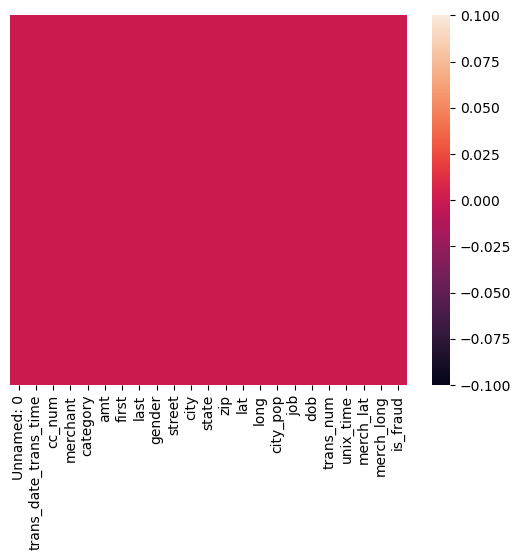

In [10]:
sns.heatmap(df.isnull() , yticklabels = 0)


DROPPING UNNECESSARY COLUMNS

In [11]:
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'])

In [12]:
df

trans_date_trans_time                              merchant  \
0        2020-06-21 12:14:25                 fraud_Kirlin and Sons   
1        2020-06-21 12:14:33                  fraud_Sporer-Keebler   
2        2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch   
3        2020-06-21 12:15:15                     fraud_Haley Group   
4        2020-06-21 12:15:17                 fraud_Johnston-Casper   
...                      ...                                   ...   
555714   2020-12-31 23:59:07                 fraud_Reilly and Sons   
555715   2020-12-31 23:59:09                  fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15                       fraud_Rau-Robel   
555717   2020-12-31 23:59:24                 fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34                     fraud_Dare-Marvin   

              category     amt gender          city state    zip      lat  \
0        personal_care    2.86      M      Columbia    SC  29209  33.9659   
1        personal_care   29.84      F       Altonah    UT  84002  40.3207   
2       health_fitness   41.28      F      Bellmore    NY  11710  40.6729   
3             misc_pos   60.05      M    Titusville    FL  32780  28.5697   
4               travel    3.19      M      Falmouth    MI  49632  44.2529   
...                ...     ...    ...           ...   ...    ...      ...   
555714  health_fitness   43.77      M         Luray    MO  63453  40.4931   
555715       kids_pets  111.84      M  Lake Jackson    TX  77566  29.0393   
555716       kids_pets   86.88      F       Burbank    WA  99323  46.1966   
555717          travel    7.99      M          Mesa    ID  83643  44.6255   
555718   entertainment   38.13      M        Edmond    OK  73034  35.6665   

            long  city_pop                     job         dob   unix_time  \
0       -80.9355    333497     Mechanical engineer  1968-03-19  1371816865   
1      -110.4360       302  Sales professional, IT  1990-01-17  1371816873   
2       -73.5365     34496       Librarian, public  1970-10-21  1371816893   
3       -80.8191     54767            Set designer  1987-07-25  1371816915   
4       -85.0170      1126      Furniture designer  1955-07-06  1371816917   
...          ...       ...                     ...         ...         ...   
555714  -91.8912       519            Town planner  1966-02-13  1388534347   
555715  -95.4401     28739          Futures trader  1999-12-27  1388534349   
555716 -118.9017      3684                Musician  1981-11-29  1388534355   
555717 -116.4493       129            Cartographer  1965-12-15  1388534364   
555718  -97.4798    116001             Media buyer  1993-05-10  1388534374   

        merch_lat  merch_long  is_fraud  
0       33.986391  -81.200714         0  
1       39.450498 -109.960431         0  
2       40.495810  -74.196111         0  
3       28.812398  -80.883061         0  
4       44.959148  -85.884734         0  
...           ...         ...       ...  
555714  39.946837  -91.333331         0  
555715  29.661049  -96.186633         0  
555716  46.658340 -119.715054         0  
555717  44.470525 -117.080888         0  
555718  36.210097  -97.036372         0  

[555719 rows x 17 columns]

CORRELATION HEATMAP FOR NUMERIC FEATURES 

<Axes: >

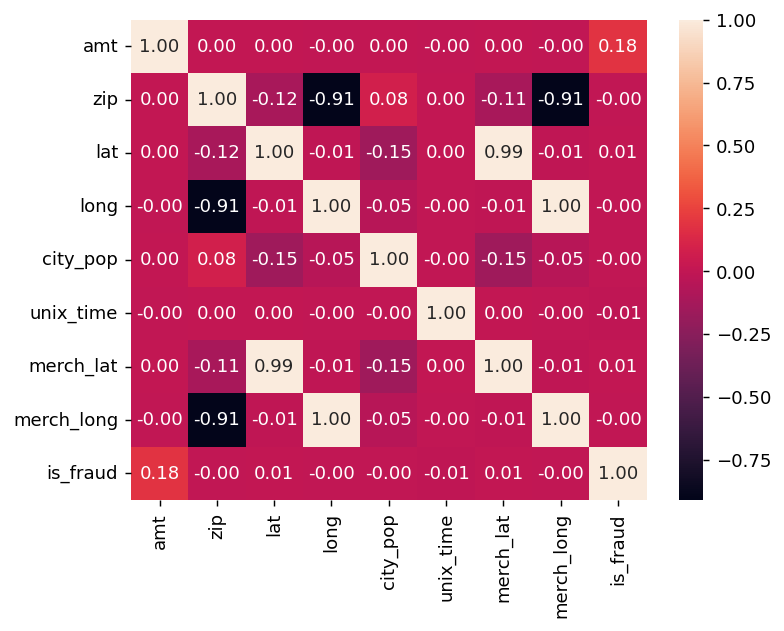

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt= '.2f')

ENCODING CATEGORICAL VARIABLE

In [14]:
categorical_columns = ['merchant', 'category', 'gender', 'job']
ohe = OneHotEncoder(sparse=True, drop='first')  # Keep sparse format
encoded_data = ohe.fit_transform(df[categorical_columns])

# Convert to DataFrame if necessary (be cautious with large datasets)
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))


In [15]:
encoded_df.head()

merchant_fraud_Abbott-Steuber  merchant_fraud_Abernathy and Sons  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   merchant_fraud_Abshire PLC  merchant_fraud_Adams, Kovacek and Kuhlman  \
0                           0                                          0   
1                           0                                          0   
2                           0                                          0   
3                           0                                          0   
4                           0                                          0   

   merchant_fraud_Adams-Barrows  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   merchant_fraud_Ankunding-Carroll  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

   merchant_fraud_Armstrong, Walter and Gottlieb  ...  job_Video editor  \
0                                              0  ...                 0   
1                                              0  ...                 0   
2                                              0  ...                 0   
3                                              0  ...                 0   
4                                              0  ...                 0   

   job_Visual merchandiser  job_Volunteer coordinator  job_Warden/ranger  \
0                        0                          0                  0   
1                        0                          0                  0   
2                        0                          0                  0   
3                        0                          0                  0   
4                        0                          0                  0   

   job_Waste management officer  job_Water engineer  \
0                             0                   0   
1                             0                   0   
2                             0                   0   
3                             0                   0   
4                             0                   0   

   job_Water quality scientist  job_Web designer  job_Wellsite geologist  \
0                            0                 0                       0   
1                            0                 0                       0   
2                            0                 0                       0   
3                            0                 0                       0   
4                            0                 0                       0   

   job_Writer  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 1183 columns]

CONVERTING DATE/TIME COLUMNS

In [17]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract datetime components
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_month'] = df['trans_date_trans_time'].dt.month

df

trans_date_trans_time                              merchant  \
0        2020-06-21 12:14:25                 fraud_Kirlin and Sons   
1        2020-06-21 12:14:33                  fraud_Sporer-Keebler   
2        2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch   
3        2020-06-21 12:15:15                     fraud_Haley Group   
4        2020-06-21 12:15:17                 fraud_Johnston-Casper   
...                      ...                                   ...   
555714   2020-12-31 23:59:07                 fraud_Reilly and Sons   
555715   2020-12-31 23:59:09                  fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15                       fraud_Rau-Robel   
555717   2020-12-31 23:59:24                 fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34                     fraud_Dare-Marvin   

              category     amt gender          city state    zip      lat  \
0        personal_care    2.86      M      Columbia    SC  29209  33.9659   
1        personal_care   29.84      F       Altonah    UT  84002  40.3207   
2       health_fitness   41.28      F      Bellmore    NY  11710  40.6729   
3             misc_pos   60.05      M    Titusville    FL  32780  28.5697   
4               travel    3.19      M      Falmouth    MI  49632  44.2529   
...                ...     ...    ...           ...   ...    ...      ...   
555714  health_fitness   43.77      M         Luray    MO  63453  40.4931   
555715       kids_pets  111.84      M  Lake Jackson    TX  77566  29.0393   
555716       kids_pets   86.88      F       Burbank    WA  99323  46.1966   
555717          travel    7.99      M          Mesa    ID  83643  44.6255   
555718   entertainment   38.13      M        Edmond    OK  73034  35.6665   

            long  city_pop                     job         dob   unix_time  \
0       -80.9355    333497     Mechanical engineer  1968-03-19  1371816865   
1      -110.4360       302  Sales professional, IT  1990-01-17  1371816873   
2       -73.5365     34496       Librarian, public  1970-10-21  1371816893   
3       -80.8191     54767            Set designer  1987-07-25  1371816915   
4       -85.0170      1126      Furniture designer  1955-07-06  1371816917   
...          ...       ...                     ...         ...         ...   
555714  -91.8912       519            Town planner  1966-02-13  1388534347   
555715  -95.4401     28739          Futures trader  1999-12-27  1388534349   
555716 -118.9017      3684                Musician  1981-11-29  1388534355   
555717 -116.4493       129            Cartographer  1965-12-15  1388534364   
555718  -97.4798    116001             Media buyer  1993-05-10  1388534374   

        merch_lat  merch_long  is_fraud  transaction_hour  transaction_day  \
0       33.986391  -81.200714         0                12               21   
1       39.450498 -109.960431         0                12               21   
2       40.495810  -74.196111         0                12               21   
3       28.812398  -80.883061         0                12               21   
4       44.959148  -85.884734         0                12               21   
...           ...         ...       ...               ...              ...   
555714  39.946837  -91.333331         0                23               31   
555715  29.661049  -96.186633         0                23               31   
555716  46.658340 -119.715054         0                23               31   
555717  44.470525 -117.080888         0                23               31   
555718  36.210097  -97.036372         0                23               31   

        transaction_month  
0                       6  
1                       6  
2                       6  
3                       6  
4                       6  
...                   ...  
555714                 12  
555715                 12  
555716                 12  
555717                 12  
555718                 12  

[555719 rows x 20 columns]

DROPPING CATEGORICAL COLUMNS

In [33]:

del df["category"]
del df["city"]
del df["job"]
del df["gender"]
del df["state"]
del df["trans_date_trans_time"]

In [35]:
del df["merchant"]

In [64]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.to_datetime('now') - df['dob']).dt.days // 365

df

amt       zip       lat      long  city_pop        dob  \
0      -0.424463 -0.731091 -0.904377  0.677451  0.816521 1968-03-19   
1      -0.252337  1.309217  0.351182 -1.472454 -0.292685 1990-01-17   
2      -0.179353 -1.382695  0.420768  1.216667 -0.178853 1970-10-21   
3      -0.059605 -0.598119 -1.970539  0.685934 -0.111371 1987-07-25   
4      -0.422358  0.029394  1.128092  0.380004 -0.289942 1955-07-06   
...          ...       ...       ...       ...       ...        ...   
555714 -0.163467  0.544041  0.385244 -0.120967 -0.291963 1966-02-13   
555715  0.270803  1.069562 -1.877757 -0.379599 -0.198018 1999-12-27   
555716  0.111564  1.879720  1.512121 -2.089408 -0.281427 1981-11-29   
555717 -0.391735  1.295849  1.201709 -1.910685 -0.293261 1965-12-15   
555718 -0.199449  0.900806 -0.568379 -0.528246  0.092477 1993-05-10   

        unix_time  merch_lat  merch_long  is_fraud  transaction_hour  \
0       -1.703871  -0.894145    0.657586 -0.062248         -0.118789   
1       -1.703869   0.178126   -1.436610 -0.062248         -0.118789   
2       -1.703865   0.383257    1.167640 -0.062248         -0.118789   
3       -1.703861  -1.909485    0.680717 -0.062248         -0.118789   
4       -1.703861   1.259139    0.316510 -0.062248         -0.118789   
...           ...        ...         ...       ...               ...   
555714   1.510350   0.275527   -0.080241 -0.062248          1.496265   
555715   1.510351  -1.742946   -0.433644 -0.062248          1.496265   
555716   1.510352   1.592587   -2.146912 -0.062248          1.496265   
555717   1.510354   1.163252   -1.955100 -0.062248          1.496265   
555718   1.510355  -0.457767   -0.495519 -0.062248          1.496265   

        transaction_day  transaction_month  age  
0              0.506526          -1.773597   56  
1              0.506526          -1.773597   34  
2              0.506526          -1.773597   53  
3              0.506526          -1.773597   37  
4              0.506526          -1.773597   69  
...                 ...                ...  ...  
555714         1.623183           1.259458   58  
555715         1.623183           1.259458   24  
555716         1.623183           1.259458   42  
555717         1.623183           1.259458   58  
555718         1.623183           1.259458   31  

[555719 rows x 14 columns]

In [66]:
del df["dob"]

LINE PLOT FOR MONTHLY TRANSACTION

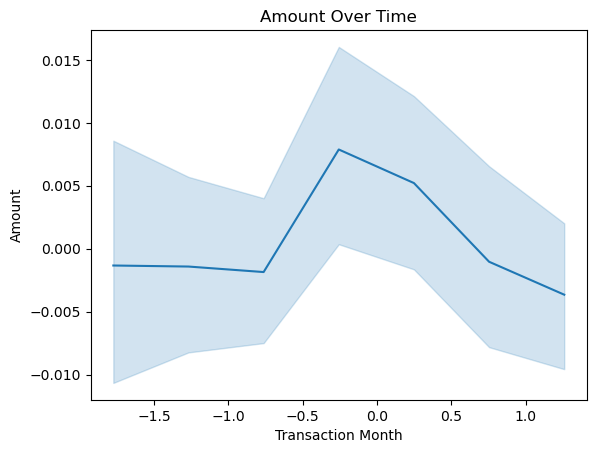

In [67]:
sns.lineplot(x='transaction_month', y='amt', data=df)

# Set the labels and title
plt.xlabel('Transaction Month')
plt.ylabel('Amount')
plt.title('Amount Over Time')

# Display the plot
plt.show()

FEATURE SCALLING AND MODEL PREPARATION

In [68]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud'].astype(int)

In [69]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODEL TRAINING

In [76]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

print(f'Logistic Regression')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
          16       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

[[166024     52]
 [   640      0]]


In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f'Decision Tree')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
[[165726    350]
 [   270    370]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
          16       0.51      0.58      0.54       640

    accuracy                           1.00    166716
   macro avg       0.76      0.79      0.77    166716
weighted avg       1.00      1.00      1.00    166716



In [77]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f'Random Forest:')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Random Forest:
[[165726    350]
 [   270    370]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
          16       0.51      0.58      0.54       640

    accuracy                           1.00    166716
   macro avg       0.76      0.79      0.77    166716
weighted avg       1.00      1.00      1.00    166716

